<a href="https://colab.research.google.com/gist/nadavo11/99d776caccb6f1419db87e02d311a379/copy-of-hufman-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
from operator import itemgetter

# let us generate arr, a random string of 10,000 letter length with a specific distribution alphabet of size D = 2 of the following probability mass function:

\begin{align}
       p= \left(\frac{1}{2} ,\frac{1}{4},\frac{1}{4},\frac{1}{16},\frac{1}{16},\frac{1}{16},\frac{1}{16}\right) .
    \end{align}

In [ ]:
arr = np.random.rand(10000)
def map(x):
    if 0<=x<(1/2): return 0        #A
    if (1/2)<=x<(5/8): return 1    #B
    if (5/8)<=x<(6/8): return 2    #C
    if (6/8)<=x<(13/16): return 3    #D
    if (13/16)<=x<(14/16): return 4    #E
    if (14/16)<=x<(15/16): return 5    #F
    if (15/16)<=x<(1): return 6    #G
arr = np.array([map(i) for i in arr])

we would want to see for each letter $x$ if the counted occurance in ```arr``` corrsponds to $p(x)$

---






Counter({0: 4952, 1: 1293, 2: 1280, 4: 677, 3: 636, 5: 599, 6: 563})
[4952 1293 1280  636  677  599  563]


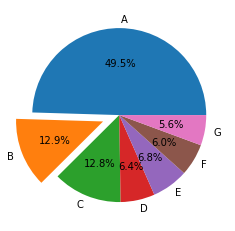

In [ ]:

c = Counter(arr)
mylabels = ["A", "B", "C", "D","E","F", "G"]
myexplode = [0, 0.2, 0, 0, 0, 0, 0]

sorted(c.items(),key=itemgetter(0))

C = np.array(list(dict(sorted(c.items())).values()))
print(c)
print(C)

plt.pie(C,labels = mylabels, explode = myexplode, autopct='%1.1f%%')
plt.show()


## **encoding the message with binary value**

let us try assigning each letter its numbers' binary value:
*   A - 000
*   B - 001
*   C - 010
*   D - 011
*   E - 100
*   F - 101
*   G - 110

we will plot the frequancy of ones and zeros, and print the total length of the compressed messege

length:  30000


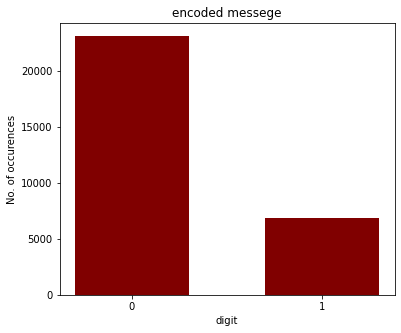

In [ ]:
st = ''
for i in arr:
    code = ''          #transform to bin
    d = {0:'000',1:"001",2:"010",3:"011",4:"100",5:"101",6:"110"}
    #zeros+= max(0,code.find("0"))
    #ones += max(0,code.find("1"))
    st= st + d[i]


zeros = st.count('0')
ones = st.count('1')
print("Total lengthof the compressed file: ",zeros+ones)
#create Chart
fig = plt.figure(figsize=(6, 5))

# creating the bar plot
plt.bar(["0","1"],[zeros,ones] , color='maroon',
        width=0.6)

plt.xlabel("digit")
plt.ylabel("No. of occurences")
plt.title("encoded messege")
plt.show()

##########################

here frequancies of ones and zeros are way out of balance, and the total messege length is 30,000, average of 3 per symbol, which is quite a lot: notice that the enthropy  is much smaller:

$H(X) = -\sum_{i=1}^n p(x)log(p(x))$

$   =-\frac{1}{2} log(\frac{1}{2}) - 2⋅\frac{1}{8} log(\frac{1}{8})-4̇⋅\frac{1}{16} log(\frac{1}{16}) $

$ = \frac{1}{2}+\frac{3}{4}+1 $

$= 2\frac{1}{4}$

 that is because this encoding scheme is suboptimal, which leads us to another solution:

## **encoding the message with Hoffman Coding**

let us try to assign a Huffman code to the alphabeth:
*   A - 0
*   B - 100
*   C - 101
*   D - 1100
*   E - 1101
*   F - 1110
*   G - 1111

we will, again, plot the frequancy of ones and zeros, and print the total length of the compressed messege.

length:  22571


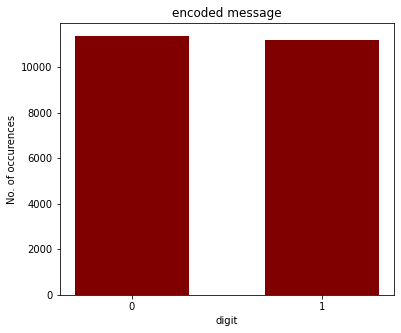

In [ ]:
st = ''
for i in arr:
    code = ''          #transform to bin
    d = {0:'0',1:"100",2:"101",3:"1100",4:"1101",5:"1110",6:"1111"}
    #zeros+= max(0,code.find("0"))
    #ones += max(0,code.find("1"))
    st= st + d[i]


zeros = st.count('0')
ones = st.count('1')
print("Total lengthof the compressed file: ",zeros+ones)
#create Chart
fig = plt.figure(figsize=(6, 5))

# creating the bar plot
plt.bar(["0","1"],[zeros,ones] , color='maroon',
        width=0.6)

plt.xlabel("digit")
plt.ylabel("No. of occurences")
plt.title("encoded message")
plt.show()

##########################

we see in this resault: the ones and zeros are evenly distributed, which is expected in an optimally encoded message, and also,the length of the compressed message is way smaller. what makes the huffman cpde a perfect encoding scheme in this case is that $E(l(X))=H(X)$

and in fact, we see that the enthropy we measured approximately matches the average symbol length. this is because the probability distribution function is as such that every robabillity is a power of 2.